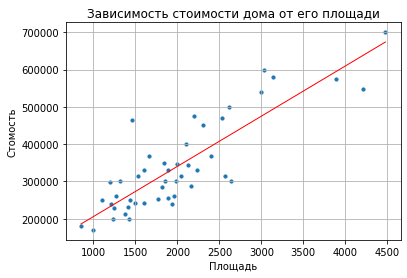

square_house = 1650, cost = 293237.22
square_house = 2200, cost = 367226.13
R^2: 0.7310
MAE: 52004.8140
MSE: 4116265480.8661
RMSE: 64158.1287
----------------------------------------------------------------------------------------------------


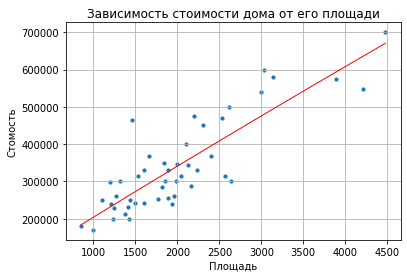

square_house = 1650, cost = 293387.08
square_house = 2200, cost = 368112.59
R^2: 0.7311
MAE: 51990.9615
MSE: 4115290102.0599
RMSE: 64150.5269
----------------------------------------------------------------------------------------------------


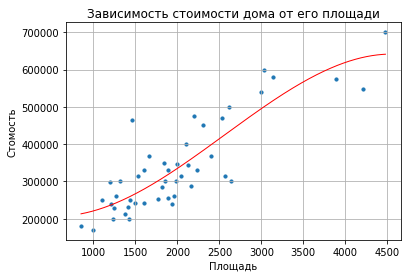

square_house = 1650, cost = 285422.83
square_house = 2200, cost = 365824.75
R^2: 0.7380
MAE: 51519.3422
MSE: 4009385955.4423
RMSE: 63319.7122
----------------------------------------------------------------------------------------------------
square_house = 1650, rooms = 3, cost = 293081.46
square_house = 2200, rooms = 4, cost = 360909.32
R^2: 0.7329
MAE: 51502.7684
MSE: 4086560101.2057
RMSE: 63926.2082


,Степень полинома 1,Степень полинома 2,Степень полинома 3,Множественная линейная
R^2,7.310038e-01,7.310675e-01,7.379883e-01,7.329450e-01
MAE,5.200481e+04,5.199096e+04,5.151934e+04,5.150277e+04
MSE,4.116265e+09,4.115290e+09,4.009386e+09,4.086560e+09
RMSE,6.415813e+04,6.415053e+04,6.331971e+04,6.392621e+04


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Считываем данные из файла
data = np.genfromtxt('ex1data2.txt', delimiter=',')

# x - площадь, y - цена
x, y = data[:,0], data[:,2]

# Отсеиваем NaN
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]

results = dict()

# Проходимся по степеням полинома (от 1 до 3)
for deg in [1, 2, 3]:
    # x - входные значения, y - выходные значения

    # f1p - полиномиальные коэффициенты в порядке убывания,
    # residuals - остаточные суммы квадратов,
    # rank - эффективные ранги масштабированной матрицы коэффициентов Вандермонда,
    # sv - сингулярные значения масштабированной матрицы коэффициентов Вандермонда,
    # rcond - коэффициент отсечки для малых сингулярных значений
    f1p, residuals, rank, sv, rcond = np.polyfit(x, y, deg, full=True)

    # Создаём полиномиальный объект
    f1 = np.poly1d(f1p)

    # Генерируем последовательность от мин до макс с шагом 500
    fx = np.linspace(min(x), max(x), 500)

    # Диаграмма рассеяния по x и y с размером маркера 10
    plt.scatter(x, y, s=10)

    # График решений полинома с толщиной линии 1 и цветом линии - красный 
    plt.plot(fx, f1(fx), linewidth=1.0, color='r')

    # Заголовок
    plt.title('Зависимость стоимости дома от его площади')

    # OX
    plt.xlabel('Площадь')

    # OY
    plt.ylabel('Стомость')

    # Сетка
    plt.grid(True)

    # Отображение
    plt.show()


    # Вывод значений 1650, 2200 и соответствующих решений полинома с округлением до двух знаков после запятой
    for val in [1650, 2200]:
        print(f'square_house = {val}, cost = {f1(val):.2f}')

    # Генерируем с помощью генератора списка список решений полинома для площади
    y_pred_simple_model = [f1(val) for val in x]

    results[f'Степень полинома {deg}'] = [
        # Оценка R2
        r2_score(y, y_pred_simple_model),
        # Cредняя абсолютная ошибка
        mean_absolute_error(y, y_pred_simple_model),
        # Среднеквадратичная ошибка
        mean_squared_error(y, y_pred_simple_model),
        # Корень из среднеквадратичной ошибки
        np.sqrt(mean_squared_error(y, y_pred_simple_model))
    ]

    # Вывод с форматированием (4 знака после запятой)
    print('R^2: {:.4f}'.format(r2_score(y, y_pred_simple_model)))
    print('MAE: {:.4f}'.format(mean_absolute_error(y, y_pred_simple_model)))
    print('MSE: {:.4f}'.format(mean_squared_error(y, y_pred_simple_model)))
    print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y, y_pred_simple_model))))

    # Разделитель
    print('-' * 100)

# x - количество комнат, y - цена
x, y = data[:,[0,1]], data[:,2]

# Отсеиваем NaN
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]

# Объект класса линейной регрессии
model = LinearRegression()

# Обучение модели
model.fit(x, y)

# Список тестов
x_test = [[1650, 3], [2200, 4]]

# Получение предсказаний для тестов
y_pred = model.predict(x_test)

# Проходимся одновременно по тестам и предсказанным значениям, объединённым в кортежи (тест, значение)
for test_val, pred_val in zip(x_test, y_pred):
    # Вывод значений с распаковкой итерируемых объектов в списке и форматированием (2 знака после запятой)
    print('square_house = {}, rooms = {}, cost = {:.2f}'.format(*test_val, pred_val))

# Получение предсказаний для значений x
y_pred_multiple_model = model.predict(x)

results[f'Множественная линейная'] = [
        # Оценка R2
        r2_score(y, y_pred_multiple_model),
        # Cредняя абсолютная ошибка
        mean_absolute_error(y, y_pred_multiple_model),
        # Среднеквадратичная ошибка
        mean_squared_error(y, y_pred_multiple_model),
        # Корень из среднеквадратичной ошибки
        np.sqrt(mean_squared_error(y, y_pred_multiple_model))
]

# Вывод с форматированием (4 знака после запятой)
print('R^2: {:.4f}'.format(r2_score(y, y_pred_multiple_model)))
print('MAE: {:.4f}'.format(mean_absolute_error(y, y_pred_multiple_model)))
print('MSE: {:.4f}'.format(mean_squared_error(y, y_pred_multiple_model)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y, y_pred_multiple_model))))

# Таблица с результатами оценки и подписями из index
pd.DataFrame(results, index=['R^2', 'MAE', 'MSE', 'RMSE'])

---

Для простой регрессии наименьшую ошибку даёт полином 3-ей степени, что может быть связано с нелинейным характером расположения точек в промежутке [3500, 4500].

---

## Прогнозные значения

---

### Линейная регрессия

square_house = 1650, cost = 293237.22

square_house = 2200, cost = 367226.13

---

### Полиномиальная регрессия (степень полинома - 2)

square_house = 1650, cost = 293387.08

square_house = 2200, cost = 368112.59

---

### Полиномиальная регрессия (степень полинома - 3)

square_house = 1650, cost = 285422.83

square_house = 2200, cost = 365824.75

---

### Множественная линейная регрессия

square_house = 1650, rooms = 3, cost = 293081.46

square_house = 2200, rooms = 4, cost = 360909.32

---